In [28]:
import pandas as pd
df =pd.read_csv(r"C:\Users\devin\Desktop\ASSET ARBITRAGE\final_gold_dataset.csv")

In [29]:
df.head()

,Date,Close,High,Low,Open,Volume,Price
0,2004-01-03,399.299988,396.399994,396.399994,396.399994,2.0,399.299988
1,2004-01-04,427.799988,432.000000,424.500000,427.200012,1561.0,427.799988
2,2004-01-06,394.600006,399.000000,393.299988,393.899994,1864.0,394.600006
3,2004-01-07,396.000000,396.000000,396.000000,396.000000,146.0,396.000000
4,2004-01-09,408.799988,407.299988,407.299988,407.299988,0.0,408.799988


In [30]:
df.isnull().sum()

Date        0
Close       0
High        0
Low         0
Open        0
Volume      0
Price     729
dtype: int64

In [31]:
#this does forward filling as it fill the upper value to lower 
df["Price"] = df["Price"].ffill()

In [32]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Price     0
dtype: int64

In [33]:
#pct_change calculates the differenc eof present and previous row of that column
#returns tell how much change is in the volume over time
df["Returns"] = df["Price"].pct_change()
print(df)

            Date        Close         High          Low         Open  Volume  \
0     2004-01-03   399.299988   396.399994   396.399994   396.399994     2.0   
1     2004-01-04   427.799988   432.000000   424.500000   427.200012  1561.0   
2     2004-01-06   394.600006   399.000000   393.299988   393.899994  1864.0   
3     2004-01-07   396.000000   396.000000   396.000000   396.000000   146.0   
4     2004-01-09   408.799988   407.299988   407.299988   407.299988     0.0   
...          ...          ...          ...          ...          ...     ...   
6186  2025-12-03  2939.100098  2939.100098  2910.000000  2912.000000   213.0   
6187  2025-12-05  3220.000000  3300.699951  3205.000000  3300.699951   886.0   
6188  2025-12-06  3380.899902  3395.899902  3353.399902  3363.000000  1818.0   
6189  2025-12-08  3348.899902  3356.199951  3330.100098  3356.199951  1611.0   
6190  2025-12-09  3649.399902  3656.800049  3643.000000  3655.500000  1300.0   

            Price   Returns  
0      39

In [34]:
#here we fill NaN value , replaced by 0 as some ML algo and functions give error as they don't accept NaN values
df["Returns"] = df["Returns"].fillna(0)

In [35]:
df

,Date,Close,High,Low,Open,Volume,Price,Returns
0,2004-01-03,399.299988,396.399994,396.399994,396.399994,2.0,399.299988,0.000000
1,2004-01-04,427.799988,432.000000,424.500000,427.200012,1561.0,427.799988,0.071375
2,2004-01-06,394.600006,399.000000,393.299988,393.899994,1864.0,394.600006,-0.077606
3,2004-01-07,396.000000,396.000000,396.000000,396.000000,146.0,396.000000,0.003548
4,2004-01-09,408.799988,407.299988,407.299988,407.299988,0.0,408.799988,0.032323
...,...,...,...,...,...,...,...,...
6186,2025-12-03,2939.100098,2939.100098,2910.000000,2912.000000,213.0,2939.100098,0.010347
6187,2025-12-05,3220.000000,3300.699951,3205.000000,3300.699951,886.0,3220.000000,0.095573
6188,2025-12-06,3380.899902,3395.899902,3353.399902,3363.000000,1818.0,3380.899902,0.049969
6189,2025-12-08,3348.899902,3356.199951,3330.100098,3356.199951,1611.0,3348.899902,-0.009465


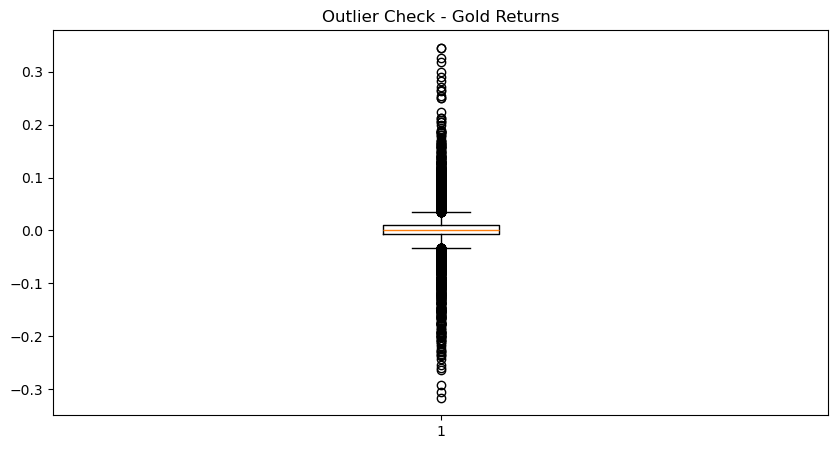

In [36]:
import matplotlib.pyplot as plt
#checking outliers
plt.figure(figsize=(10,5))
plt.boxplot(df["Returns"])
plt.title("Outlier Check - Gold Returns")
plt.show()

In [37]:
Q1 = df["Returns"].quantile(0.25)
Q3 = df["Returns"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df["Returns"] = df["Returns"].clip(lower, upper)


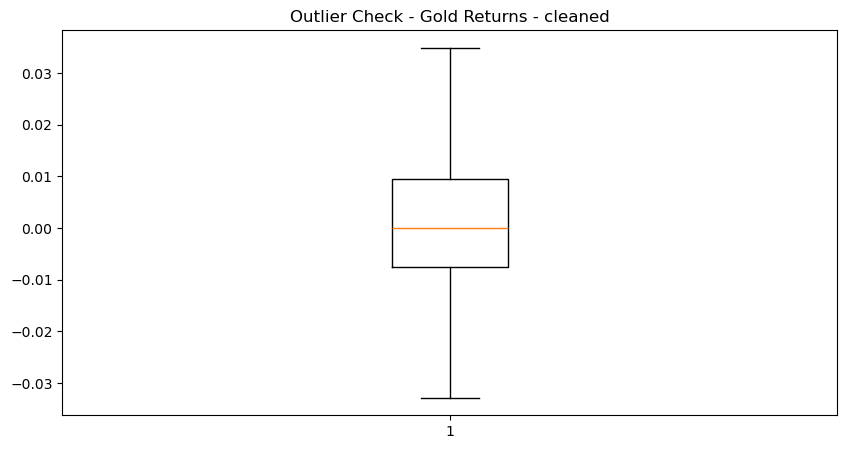

In [38]:
import matplotlib.pyplot as plt
#checking outliers
plt.figure(figsize=(10,5))
plt.boxplot(df["Returns"])
plt.title("Outlier Check - Gold Returns - cleaned")
plt.show()

,Date,Close,High,Low,Open,Volume,Price,Returns
0,2004-01-03,399.299988,396.399994,396.399994,396.399994,2.0,399.299988,0.000000
1,2004-01-04,427.799988,432.000000,424.500000,427.200012,1561.0,427.799988,0.034894
2,2004-01-06,394.600006,399.000000,393.299988,393.899994,1864.0,394.600006,-0.032866
3,2004-01-07,396.000000,396.000000,396.000000,396.000000,146.0,396.000000,0.003548
4,2004-01-09,408.799988,407.299988,407.299988,407.299988,0.0,408.799988,0.032323
...,...,...,...,...,...,...,...,...
6186,2025-12-03,2939.100098,2939.100098,2910.000000,2912.000000,213.0,2939.100098,0.010347
6187,2025-12-05,3220.000000,3300.699951,3205.000000,3300.699951,886.0,3220.000000,0.034894
6188,2025-12-06,3380.899902,3395.899902,3353.399902,3363.000000,1818.0,3380.899902,0.034894
6189,2025-12-08,3348.899902,3356.199951,3330.100098,3356.199951,1611.0,3348.899902,-0.009465


In [42]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df[["Price_scaled", "Volume_scaled", "Returns_scaled"]] = ss.fit_transform(df[["Price", "Volume", "Returns"]])

In [44]:
df

,Date,Close,High,Low,Open,Volume,Price,Returns,Price_scaled,Volume_scaled,Returns_scaled
0,2004-01-03,399.299988,396.399994,396.399994,396.399994,2.0,399.299988,0.000000,-1.582548,-0.264999,-0.053025
1,2004-01-04,427.799988,432.000000,424.500000,427.200012,1561.0,427.799988,0.034894,-1.535744,-0.237137,1.783054
2,2004-01-06,394.600006,399.000000,393.299988,393.899994,1864.0,394.600006,-0.032866,-1.590266,-0.231722,-1.782410
3,2004-01-07,396.000000,396.000000,396.000000,396.000000,146.0,396.000000,0.003548,-1.587967,-0.262425,0.133662
4,2004-01-09,408.799988,407.299988,407.299988,407.299988,0.0,408.799988,0.032323,-1.566946,-0.265035,1.647799
...,...,...,...,...,...,...,...,...,...,...,...
6186,2025-12-03,2939.100098,2939.100098,2910.000000,2912.000000,213.0,2939.100098,0.010347,2.588399,-0.261228,0.491439
6187,2025-12-05,3220.000000,3300.699951,3205.000000,3300.699951,886.0,3220.000000,0.034894,3.049703,-0.249200,1.783054
6188,2025-12-06,3380.899902,3395.899902,3353.399902,3363.000000,1818.0,3380.899902,0.034894,3.313938,-0.232544,1.783054
6189,2025-12-08,3348.899902,3356.199951,3330.100098,3356.199951,1611.0,3348.899902,-0.009465,3.261387,-0.236244,-0.551064


In [45]:
import os

# Folder path
folder_path = r"C:\Users\devin\Desktop\ASSET ARBITRAGE"

# File path with new name
file_path = os.path.join(folder_path, "final_dataset_preprocessed.csv")

# Save the DataFrame
df.to_csv(file_path, index=False)

print(f"Dataset saved as: {file_path}")

Dataset saved as: C:\Users\devin\Desktop\ASSET ARBITRAGE\final_dataset_preprocessed.csv
